In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 🍭 Cluster 003: Flavour Insights

_Datenexploration und Analyse der Flavour-Profile aus dem Leafly Strain Dataset_

---

## Inhaltsverzeichnis

1. [Setup & Overview](#setup--overview)
2. [DataFrame Struktur](#dataframe-struktur)
3. [Deskriptive Statistik](#deskriptive-statistik)
4. [Visualisierung der Flavours](#visualisierung-der-flavours)
5. [Weitere Analysen & Ideen](#weitere-analysen--ideen)
6. [Fazit & To Dos](#fazit--to-dos)

---

> _Hinweis: Der DataFrame enthält bereits die wichtigsten Flavour-Scores pro Strain sowie den Strain-Namen und das durchschnittliche Rating._


---
## <a id="setup--overview"></a>1. Setup & Overview

- Dieses Notebook untersucht die Flavour-Scores verschiedener Strains auf Basis des Leafly-Datensatzes.
- Für jeden Strain sind die wichtigsten Flavour-Merkmale als separate Spalten enthalten.
---


In [3]:
df = pd.read_csv("../csv/strains.csv")
df = df.set_index("id").sort_values("id")

In [ ]:
flavor_cols = [
    col for col in df.columns if col.startswith("flavor_") and col.endswith("_score")
]
df_flavors = df[["averageRating", "name"] + flavor_cols]

---
## <a id="dataframe-struktur"></a>2. DataFrame Struktur

- Überblick über die Spalten und Beispiel-Datensätze (`df_flavors.head()`, `df_flavors.info()`).
- Felder: name, averageRating, flavor_ammonia_score, flavor_apple_score, ..., flavor_woody_score.
---


In [7]:
df_flavors.head()

,name,averageRating,flavor_ammonia_score,flavor_apple_score,flavor_apricot_score,flavor_berry_score,flavor_blueCheese_score,flavor_blueberry_score,flavor_butter_score,flavor_cheese_score,...,flavor_strawberry_score,flavor_sweet_score,flavor_tar_score,flavor_tea_score,flavor_tobacco_score,flavor_treeFruit_score,flavor_tropical_score,flavor_vanilla_score,flavor_violet_score,flavor_woody_score
id,,,,,,,,,,,,,,,,,,,,,
1,AK-47,4.060496,-0.524449,-1.263211,-1.521205,-1.260940,-1.455552,-1.477364,-1.454589,-1.259149,...,-1.495604,-0.086950,0.299993,-0.269964,1.924542,-0.546600,-0.902390,-1.327380,-0.923616,1.565616
2,Chemdawg,4.262460,0.272779,-1.188178,-1.106155,-1.092478,-1.237233,-1.203048,-1.030617,-1.085952,...,-1.243357,-0.695649,0.052855,-0.640874,-0.168703,-0.890516,-1.038792,-1.186957,-1.250729,0.258957
3,Mr. Nice Guy,4.103067,-1.075217,-1.302872,-1.705689,-0.876851,-1.312388,-1.164363,-1.220014,-1.150885,...,-1.247961,0.820083,-0.121315,-0.224522,-0.498152,-0.223382,-0.860087,-1.302634,-0.766799,1.301704
6,Super Silver Haze,4.355109,0.459234,-1.175719,-0.923911,-1.241023,-1.344886,-1.430461,-0.911304,-1.039815,...,-1.452236,0.649875,-1.465384,-0.027229,-0.474655,-0.279417,-0.357794,-1.322126,-1.566659,0.325602
7,Northern Lights #5,4.267677,-0.851163,0.001281,0.979422,-0.809269,NaN,-0.675047,-1.021054,-1.012379,...,-0.894331,0.749584,-0.774828,0.213428,NaN,-0.665797,-0.745234,-1.223921,-1.684350,-0.120150


In [11]:
df_flavors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8492 entries, 1 to 518764
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   averageRating             8492 non-null   float64
 1   name                      8492 non-null   object 
 2   flavor_ammonia_score      1789 non-null   float64
 3   flavor_apple_score        1461 non-null   float64
 4   flavor_apricot_score      1324 non-null   float64
 5   flavor_berry_score        3679 non-null   float64
 6   flavor_blueCheese_score   1004 non-null   float64
 7   flavor_blueberry_score    2073 non-null   float64
 8   flavor_butter_score       1769 non-null   float64
 9   flavor_cheese_score       1734 non-null   float64
 10  flavor_chemical_score     2641 non-null   float64
 11  flavor_chestnut_score     1052 non-null   float64
 12  flavor_citrus_score       4337 non-null   float64
 13  flavor_coffee_score       1287 non-null   float64
 14  flavor_dies

---

## <a id="deskriptive-statistik"></a>3. Deskriptive Statistik

- Verteilungen, Kenngrößen, Ausreißer.
- Genutzte Methoden: `describe()`, `isnull().sum()`, `mean()`, `median()`, `quantile()`, `corr()`.
- Besonderheiten und Anmerkungen.

---


In [14]:
df_flavors.describe()

,averageRating,flavor_ammonia_score,flavor_apple_score,flavor_apricot_score,flavor_berry_score,flavor_blueCheese_score,flavor_blueberry_score,flavor_butter_score,flavor_cheese_score,flavor_chemical_score,...,flavor_strawberry_score,flavor_sweet_score,flavor_tar_score,flavor_tea_score,flavor_tobacco_score,flavor_treeFruit_score,flavor_tropical_score,flavor_vanilla_score,flavor_violet_score,flavor_woody_score
count,8492.000000,1789.000000,1461.000000,1324.000000,3679.000000,1004.000000,2073.000000,1769.000000,1734.000000,2641.000000,...,1034.000000,4697.000000,935.000000,1664.000000,1124.000000,1980.000000,2639.000000,1878.000000,869.000000,3704.000000
mean,3.973796,-0.581593,0.452524,-0.932150,0.814305,0.651585,0.959811,-0.346722,0.561982,0.075870,...,0.548410,0.165112,-0.854992,-0.915093,-0.990552,-0.714719,0.050326,0.218472,-0.717156,-0.029267
std,1.500643,1.787368,1.372139,2.419215,0.923765,1.298022,1.207838,1.607794,1.316801,1.100818,...,1.407475,0.595391,1.442680,1.363123,1.545406,1.274182,0.927139,1.161628,1.224706,0.756086
min,0.000000,-3.446964,-1.651334,-4.056029,-1.485027,-1.797483,-1.735963,-3.016986,-1.681674,-1.494583,...,-1.744634,-1.860661,-3.350836,-3.603344,-3.855698,-3.504959,-1.413348,-1.701893,-2.843223,-2.149026
25%,4.150364,-1.639328,-0.445957,-2.564425,0.193491,-0.454617,-0.017529,-1.225182,-0.346951,-0.554714,...,-0.537820,-0.228447,-1.618694,-1.827566,-1.912006,-1.481692,-0.452677,-0.458847,-1.337076,-0.531836
50%,4.500000,-1.243534,0.225619,-1.737230,0.812961,0.540261,1.019060,-0.955132,0.346562,-0.301421,...,0.283618,0.054583,-1.260256,-1.214877,-1.391458,-1.057579,-0.180504,0.014905,-1.110704,-0.207732
75%,4.727273,0.062765,0.919841,-0.165037,1.316401,1.846868,1.948285,-0.066784,1.203193,0.344027,...,1.461499,0.436202,-0.574305,-0.215581,-0.440159,-0.187373,0.217711,0.517031,-0.561240,0.288571
max,5.000000,9.004814,9.073327,8.665251,5.681428,6.051439,4.271466,7.938859,8.210241,6.847905,...,6.855438,3.897990,7.691276,6.736410,7.821397,7.708922,6.787964,8.190599,8.299080,5.206189


In [19]:
df_flavors.isnull().sum()

averageRating                  0
name                           0
flavor_ammonia_score        6703
flavor_apple_score          7031
flavor_apricot_score        7168
flavor_berry_score          4813
flavor_blueCheese_score     7488
flavor_blueberry_score      6419
flavor_butter_score         6723
flavor_cheese_score         6758
flavor_chemical_score       5851
flavor_chestnut_score       7440
flavor_citrus_score         4155
flavor_coffee_score         7205
flavor_diesel_score         4992
flavor_earthy_score         3201
flavor_flowery_score        4497
flavor_grape_score          6679
flavor_grapefruit_score     6819
flavor_honey_score          6843
flavor_lavender_score       6892
flavor_lemon_score          5542
flavor_lime_score           6764
flavor_mango_score          7250
flavor_menthol_score        7412
flavor_mint_score           6795
flavor_nutty_score          6376
flavor_orange_score         6790
flavor_peach_score          7648
flavor_pear_score           7763
flavor_pep

---
## <a id="visualisierung-der-flavours"></a>4. Visualisierung der Flavours

- Häufigkeits- oder Verteilungsplots der Flavour-Scores (z.B. welche Flavours kommen am häufigsten vor?).
- Boxplots oder Histogramme ausgewählter Flavours.
- Heatmap: Korrelationen zwischen den Flavour-Scores.
---


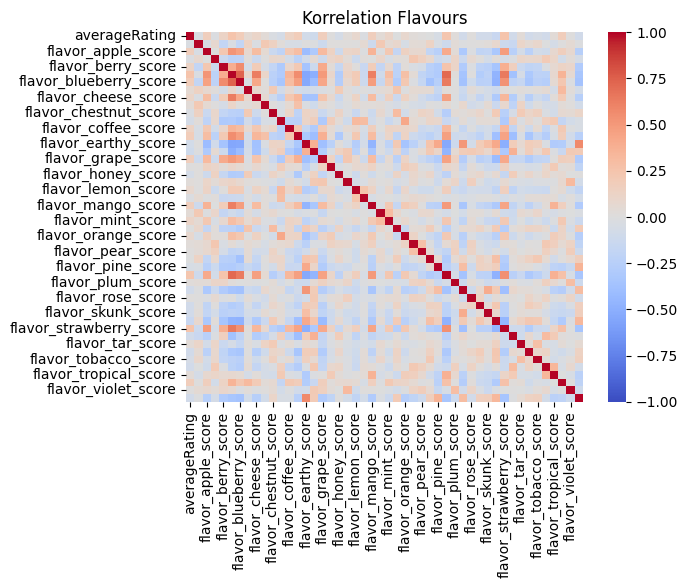

In [ ]:
sns.heatmap(
    df_flavors.corr(numeric_only=True),
    cmap="coolwarm",
    vmin=-1.0,
)
plt.title("Korrelation Flavours")
plt.show()

In [33]:
flavor_corr = df_flavors[flavor_cols].corr()

fig = px.imshow(
    flavor_corr,
    color_continuous_scale="agsunset",
    zmin=-1,
    zmax=1,
    labels=dict(color="Korrelation"),
    title="Korrelation der Flavour-Scores",
)
fig.update_layout(width=1400, height=1200, font=dict(size=12))

fig.update_xaxes(side="bottom")
fig.show()

## <a id="weitere-analysen--ideen"></a>5. Weitere Analysen & Ideen

-   Top-Strains pro Flavour (Barplots/Tables).
-   Cluster-Analyse nach Flavour-Profilen.
-   Zusammenhang von averageRating und bestimmten Flavours.
-   Ausreißer & Besonderheiten in den Flavour-Profilen.

---

## <a id="fazit--to-dos"></a>6. Fazit

-   Wichtigste Erkenntnisse der Analyse.
-   Offene Fragen und nächste Schritte.

---
